In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./../dist/new-dataset.csv')
df.head()

,Aduan,Label
0,benar sulit di salah satu kelas tidak minta ba...,Kesiswaan
1,rasa sendiri ambil putus akademis yang penting,Kesiswaan
2,rasa tidak dapat dukung yang perlu dari orang ...,Kesiswaan
3,rasa sulit untuk imbang giat ekstrakurikuler t...,Kesiswaan
4,kurang tidur dan lelah telah jadi masalah nyat...,Kesiswaan


In [3]:
df['Label'].unique()

array(['Kesiswaan', 'Prasarana', 'Kurikulum'], dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Aduan   130 non-null    object
 1   Label   130 non-null    object
dtypes: object(2)
memory usage: 2.2+ KB


In [5]:
X_text = df['Aduan']
y = df['Label']

In [6]:
X_text.head()

0    benar sulit di salah satu kelas tidak minta ba...
1       rasa sendiri ambil putus akademis yang penting
2    rasa tidak dapat dukung yang perlu dari orang ...
3    rasa sulit untuk imbang giat ekstrakurikuler t...
4    kurang tidur dan lelah telah jadi masalah nyat...
Name: Aduan, dtype: object

In [7]:
y.head()

0    Kesiswaan
1    Kesiswaan
2    Kesiswaan
3    Kesiswaan
4    Kesiswaan
Name: Label, dtype: object

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X_text)

In [9]:
print(X.shape)
print(y.shape)

(130, 389)
(130,)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)

(104, 389)
(26, 389)


In [11]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [12]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[15,  0,  0],
       [ 0,  3,  0],
       [ 3,  0,  5]])

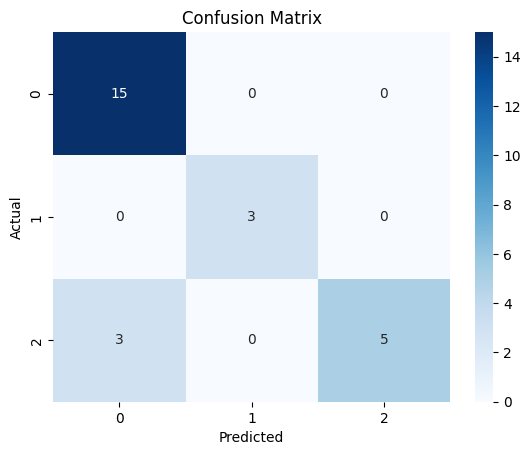

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi confusion matrix
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [14]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Accuracy: 0.8846153846153846
Precision: 0.9038461538461539
Recall: 0.8846153846153846


In [16]:
input_saran = vectorizer.transform([
  'kipas angin rusak',
  'susah memahami belajar matematika'
])
predict = model.predict(input_saran)

print(predict)

['Prasarana' 'Kesiswaan']
